# Customer Segmentation using RFM analysis

This data can get from Kaggle https://www.kaggle.com/datasets/shedai/retail-data-set

#### Customer Segmentation

Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics. The market researcher can segment customers using various approach, such as:
1. Demographic characteristics : occupation, gender, age and marital status.
2. Geographic characteristics : location, region, urban/rural
3. Psychographic characteristics : social class, lifestyle and personality characteristics 
4. Behavioral characteristics : spending, consumption habits, product/service usage, and previously purchased products

Here are some of the main benefits of customer segmentation:
- It will help in identifying the most potential customers.
- It will help managers to easily communicate with a targetted group of the audience.
- Improve customer relationship via better understanding needs of segments.
- It provides opportunities for upselling and cross-selling.
- It will help managers to design special offers for targetted customers, to encourage them to buy more products.
- It also helps in identifying new products that customers could be interested in.

#### RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. RFM analysis focuses on 3 main aspects of customers transactions: recency, frequency and purchase amount. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable businesss and to run an effective promotional campaign for personalized service.

- Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
- Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
- Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('file_out2.csv')
df.head()

,Unnamed: 0,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,1,329,2019-12-27,524,355.932203,64.067797,185,2
2,2,330,2019-12-27,192,901.694915,162.305085,230,4
3,3,330,2019-12-27,218,182.754237,32.895763,230,1
4,4,330,2019-12-27,247,780.101695,140.418305,230,4


In [3]:
df.isna().sum()

Unnamed: 0    0
InvoiceID     0
Date          0
ProductID     0
TotalSales    0
Discount      0
CustomerID    0
Quantity      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

Unnamed: 0      int64
InvoiceID       int64
Date           object
ProductID       int64
TotalSales    float64
Discount      float64
CustomerID      int64
Quantity        int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.shape

(29103, 7)

In [9]:
df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [10]:
df['Date'].min()

Timestamp('2019-01-02 00:00:00')

In [11]:
df['Date'].max()

Timestamp('2023-03-25 00:00:00')

In [12]:
#set date to current day
import datetime as dt
Now = dt.datetime(2023,3,25)
Now

datetime.datetime(2023, 3, 25, 0, 0)

In [13]:
#most recently
recent_order = df.groupby(['CustomerID']).agg({'Date': lambda x: (Now - x.max()).days}).sort_values('Date').rename(columns={'Date':'Recency'})
recent_order.head()

,Recency
CustomerID,
307,0
190,0
21,0
222,0
185,0


In [14]:
#most frequent
freq_pur = df.groupby(['CustomerID']).agg({'InvoiceID': 'nunique'}).sort_values('InvoiceID',
                                                                                  ascending=False).rename(columns=
                                                                                                          {'InvoiceID':'total_order'})
freq_pur.head()

,total_order
CustomerID,
230,814
420,500
424,479
290,408
57,360


In [15]:
#spend the most
loyal_cust = df.groupby(['CustomerID']).agg({'TotalSales': 'sum'}).sort_values('TotalSales',
                                                                                  ascending=False).rename(columns=
                                                                                                          {'TotalSales':'Monetary'})
loyal_cust.head()

,Monetary
CustomerID,
230,4.520184e+06
420,3.203069e+06
57,3.088991e+06
375,2.094873e+06
52,1.633506e+06


#### RFM Table

In [16]:
rfm_table = df.groupby(['CustomerID']).agg({'Date': lambda x: (Now - x.max()).days,
                                            'InvoiceID': lambda x: len(x.unique()),
                                            'TotalSales': lambda x: x.sum()})
rfm_table['Date'] = rfm_table['Date'].astype(int)
rfm_table.rename(columns={'Date':'Recency',
                         'InvoiceID':'Frequency',
                         'TotalSales':'Monetary_value'}, inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
0,7,37,263560.474577
1,735,13,20476.728814
2,52,22,51963.711862
3,625,1,300.847458
4,92,35,60977.720337


Text(0, 0.5, 'Frequency')

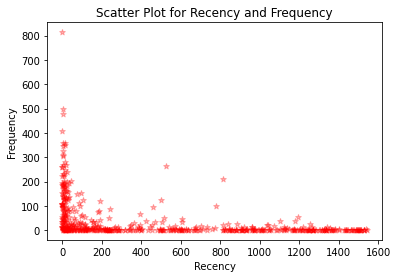

In [17]:
plt.scatter(rfm_table.groupby('CustomerID')['Recency'].sum(), df.groupby('CustomerID')['InvoiceID'].nunique(),
            color = 'red',
            marker = '*', alpha = 0.3)
plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

We can see the customers whose Recency is less than 3 months have high Frequency, customers buying more when their recency is less

Text(0, 0.5, 'Frequency')

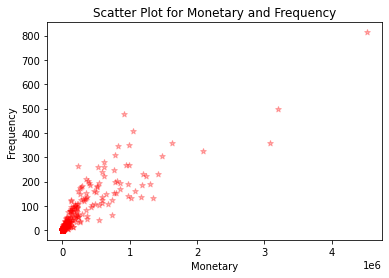

In [18]:
#Frequency Vs Monetary

market_data = df.groupby('CustomerID').agg({'InvoiceID':'nunique','TotalSales':'sum'})

plt.scatter(market_data['TotalSales'], market_data['InvoiceID'],
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

We can see, customers buying frequently are spending large amount

Text(0, 0.5, 'Frequency')

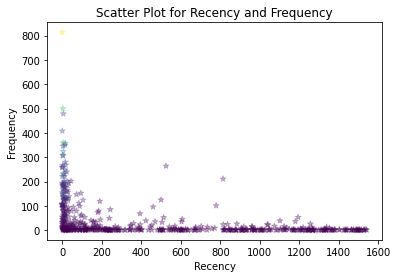

In [19]:
#Recency Vs Frequency Vs Monetary

Monetary = df.groupby('CustomerID')['TotalSales'].sum()
plt.scatter(rfm_table.groupby('CustomerID')['Recency'].sum(), df.groupby('CustomerID')['InvoiceID'].nunique(),
            marker = '*', alpha = 0.3,c=Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Now, in the above plot, the color specifies Monetary. From the above plot, we can say the customers whose Recency is less have high Frequency but less Monetary.

#### RFM Score
We used Quintiles — based on the distribution of values in the data — to calculate the RFM score.

In [20]:
#quantiles to calculate rfm score
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary_value
0.25,29.0,1.0,1872.881356
0.50,243.0,4.0,10906.449152
0.75,933.0,35.0,90924.466100


Based on the RFM Values, I have assigned a score to each customer between 1 and 4(bucketing them). 4 is the best score and 1 is the worst score.

Ex: A Customer who bought most recently and most often, and spent the most, her RFM score is 444

In [21]:
#rfm segmentation
rfm_segment = rfm_table.copy()

#x=value, p=recency,monetary,freq, k=quartiles dict
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary_value'].apply(FM_Class, args=('Monetary_value',quantiles,))

rfm_segment['RFMClass'] = rfm_segment.R_Quartile.map(str) \
                        + rfm_segment.F_Quartile.map(str) \
                        + rfm_segment.M_Quartile.map(str)

In [22]:
#best cust
rfm_segment[rfm_segment['RFMClass']=='444'].sort_values('Monetary_value',ascending=False).head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
230,0,814,4.520184e+06,4,4,4,444
420,3,500,3.203069e+06,4,4,4,444
57,4,360,3.088991e+06,4,4,4,444
375,5,324,2.094873e+06,4,4,4,444
52,15,357,1.633506e+06,4,4,4,444


Now, we have to identify some key segments.

| Segment | RFM | Description |
| :- | -: | :-: |
| Best Customers | 444/344 | Customers who bought most recently, most often and spend the most
| Loyal Customers | X4X | Customers who bought most recently
| Big Spenders | X34 | Customers who spend the most
| Need Attention | 3XX | Customers who bought recently, purchased not frequent but spend much
| New Customers | 4XX | Customers who bought most recently, purchased not frequent or the first time
| Potential Loyalist | X3X | Customers who bought recently, often and spend much
| Almost Lost | 2X4 | Haven't purchased for some time and spend the most
| Almost Lost Cheap Customers | 2X1 | Haven't purchased for some time and spend little
| Lost Customers | 1X4 | Last purchase long ago and spend the most
| Lost Cheap Customers | 1X1 | Last purchase long ago and spend little

In [23]:
seg_map = {
    r'1[1-4][1-2]': 'Lost Cheap Customers',
    r'1[1-4][3-4]': 'Lost Customers',
    r'2[1-4][1-2]': 'Almost Lost Cheap Customers',
    r'2[1-4][3-4]': 'Almost Lost',
    r'3[1-2][1-3]': 'Need Attention',
    r'[3-4]4[1-3]': 'Loyal Customers',
    r'[3-4][1-3]4': 'Big Spenders',
    r'[3-4]3[1-3]': 'Potential Loyalists',
    r'4[1-2][1-3]': 'New Customers',
    r'[3-4]44': 'Best Customers'
}

In [24]:
rfm_segment['Segment'] = rfm_segment['R_Quartile'].astype(str) + rfm_segment['F_Quartile'].astype(str) + rfm_segment['M_Quartile'].astype(str)
rfm_segment['Segment'] = rfm_segment['Segment'].replace(seg_map, regex=True)
rfm_segment.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
CustomerID,,,,,,,,
0,7,37,263560.474577,4,4,4,444,Best Customers
1,735,13,20476.728814,2,3,3,233,Almost Lost
2,52,22,51963.711862,3,3,3,333,Potential Loyalists
3,625,1,300.847458,2,1,1,211,Almost Lost Cheap Customers
4,92,35,60977.720337,3,3,3,333,Potential Loyalists


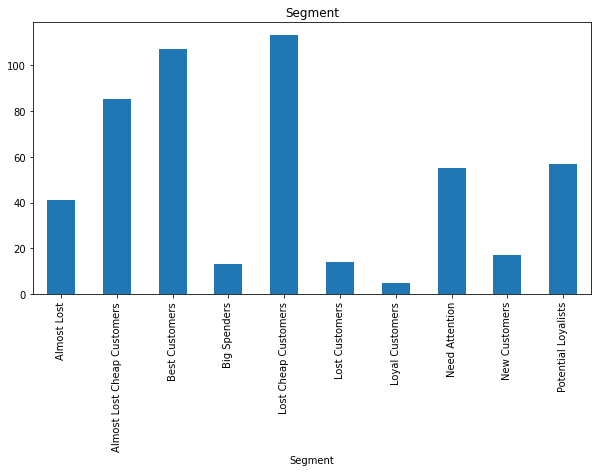

In [25]:
segment_count = rfm_segment.groupby('Segment')['Segment'].count()
segment_count.plot(kind='bar', figsize=(10,5))
plt.title('Segment')
plt.show()